In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('games 2.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.shape

(20058, 16)

In [5]:
df['opening_eco'].value_counts()

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
A71       1
E27       1
A97       1
A33       1
D82       1
Name: opening_eco, Length: 365, dtype: int64

In [6]:
df['opening_name'].value_counts()

Van't Kruijs Opening                                               368
Sicilian Defense                                                   358
Sicilian Defense: Bowdler Attack                                   296
French Defense: Knight Variation                                   271
Scotch Game                                                        271
                                                                  ... 
English Opening: King's English Variation |  Taimanov Variation      1
French Defense: Horwitz Attack |  Papa-Ticulat Gambit                1
Neo-Gruenfeld Defense: Non- or Delayed Fianchetto                    1
Sicilian Defense: Scheveningen Variation |  English Attack           1
Dutch Defense: Leningrad Variation |  Matulovic Variation            1
Name: opening_name, Length: 1477, dtype: int64

In [7]:
df = df.drop(columns=['id', 'created_at', 'last_move_at', 'white_id', 'black_id'])

In [8]:
df.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [9]:
df.victory_status.value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [10]:
df['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [11]:
df['opening_ply'].value_counts()

3     3490
4     3308
2     2935
5     2730
6     2020
7     1344
8     1116
1     1097
9      687
10     432
11     425
12     142
13     127
14      57
15      43
17      37
16      31
18      12
19      11
20       8
28       4
24       1
22       1
Name: opening_ply, dtype: int64

In [12]:
len(df['turns'].value_counts().to_dict())

211

In [13]:
edf = df.drop(columns=['moves', 'opening_name'])

In [14]:
edf.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,D10,5
1,True,16,resign,black,5+10,1322,1261,B00,4
2,True,61,mate,white,5+10,1496,1500,C20,3
3,True,61,mate,white,20+0,1439,1454,D02,3
4,True,95,mate,white,30+3,1523,1469,C41,5


In [15]:
edf.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_rating', 'black_rating', 'opening_eco', 'opening_ply'],
      dtype='object')

In [16]:
for col in edf.columns:
    print(col)
    if type(edf[col][0]) != np.int64:
        le = LabelEncoder()
        edf[col] = le.fit_transform(edf[col])

rated
turns
victory_status
winner
increment_code
white_rating
black_rating
opening_eco
opening_ply


In [17]:
type(edf['white_rating'][0]) == np.int64

True

In [18]:
edf

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
0,0,13,2,2,110,1500,1191,248,5
1,1,16,3,0,298,1322,1261,71,4
2,1,61,1,2,298,1496,1500,171,3
3,1,61,1,2,187,1439,1454,241,3
4,1,95,1,2,247,1523,1469,192,5
...,...,...,...,...,...,...,...,...,...
20053,1,24,3,2,21,1691,1220,61,2
20054,1,82,1,0,19,1233,1196,37,2
20055,1,35,1,2,19,1219,1286,239,3
20056,1,109,3,2,19,1360,1227,78,4


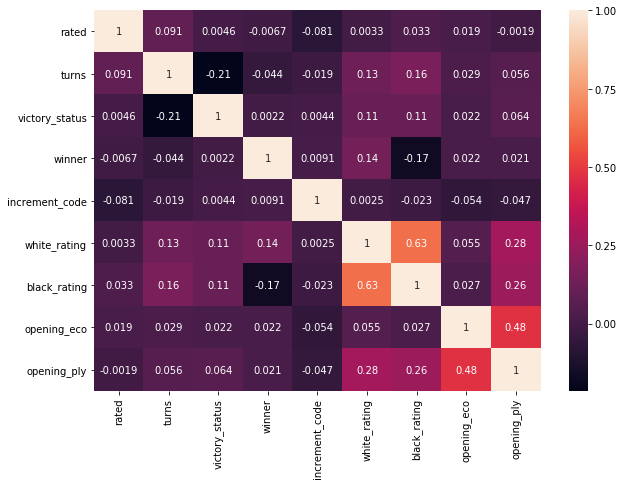

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(edf.corr(), annot=True)

In [20]:
X = edf.drop(columns=['winner'])
y = edf['winner']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
logreg = LogisticRegression(solver="newton-cg", multi_class="multinomial")
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = logreg.predict(X_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[1386,    0,  919],
       [   3,  215,    4],
       [ 689,    0, 1799]])

In [25]:
f1_score(y_test, y_pred, average='macro')

0.7690067449294297

In [26]:
logreg = LogisticRegression(solver="lbfgs", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1354    1  950]
 [ 100   10  112]
 [ 789    4 1695]]
0.44204819490689135


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [27]:
logreg = LogisticRegression(solver="liblinear", multi_class="ovr")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1385    0  920]
 [   3  214    5]
 [ 695    0 1793]]
0.7672463532803723


In [28]:
logreg = LogisticRegression(solver="sag", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1381    0  924]
 [ 115    1  106]
 [ 699    5 1784]]
0.4318344366721741


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [29]:
logreg = LogisticRegression(solver="saga", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1384    0  921]
 [ 115    1  106]
 [ 699    5 1784]]
0.4322692771648422


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [30]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)

[[-348.90477844 -214.78514655]
 [-428.05509773  -43.84869832]
 [-134.35304993    0.57265471]
 ...
 [-479.9513283    54.8007597 ]
 [-422.57078006  -82.74665836]
 [-430.55717467   81.26893035]]


rated 0 -348.90477844266144 -214.78514654692435
turns 1 -428.0550977346569 -43.848698320358764
victory_status 2 -134.3530499258759 0.5726547091313146
winner 3 -205.93796737326682 11.476290871941375
increment_code 4 -136.2089680222497 -38.47865081243146
white_rating 5 -660.6846867452543 -165.19871329165102
black_rating 6 -170.23894664102966 -60.8985926065388
opening_eco 7 235.46738764013463 497.990414934348
opening_ply 8 -249.73821568045258 -28.037429030231955


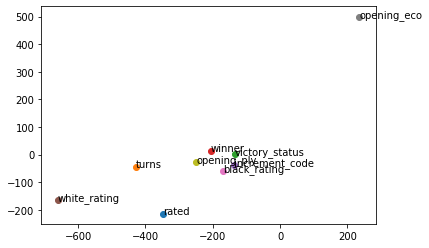

In [31]:
for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    try:
        print(edf.columns[k], k, i, j)
        plt.scatter(i, j)
        plt.text(i+0.3, j, edf.columns[k])
    except IndexError:
        pass

plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.25, random_state=0)

In [33]:
logreg = LogisticRegression(solver="newton-cg", multi_class="multinomial")
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = logreg.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[1369,    0,  936],
       [ 104,    0,  118],
       [ 704,    0, 1784]])

In [35]:
f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4269363793332745

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

svc = svm.SVC(kernel='poly', C=10, gamma='scale')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1019    0 1286]
 [  82    0  140]
 [ 424    0 2064]]
0.4075489443305465


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
svc = svm.SVC(kernel='rbf', C=10, gamma='scale')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1172    0 1133]
 [  92    0  130]
 [ 525    0 1963]]
0.419876514099276


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
mm_scaler = MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X)

In [39]:
X_scaled

array([[0.        , 0.03448276, 0.66666667, ..., 0.20785936, 0.68131868,
        0.14814815],
       [1.        , 0.04310345, 1.        , ..., 0.24405377, 0.19505495,
        0.11111111],
       [1.        , 0.17241379, 0.33333333, ..., 0.36763185, 0.46978022,
        0.07407407],
       ...,
       [1.        , 0.09770115, 0.33333333, ..., 0.25698035, 0.65659341,
        0.07407407],
       [1.        , 0.31034483, 1.        , ..., 0.22647363, 0.21428571,
        0.11111111],
       [1.        , 0.22126437, 0.33333333, ..., 0.28438469, 0.65659341,
        0.07407407]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [41]:
logreg = LogisticRegression(solver="newton-cg", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1380    0  925]
 [   3  215    4]
 [ 686    0 1802]]
0.7685122703447652


In [42]:
svc = svm.SVC(kernel='rbf', C=10, gamma='scale')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1262    0 1043]
 [   2  215    5]
 [ 602    0 1886]]
0.7615988689425507


In [43]:
pca = PCA(n_components=2)
X_scaled_r = pca.fit_transform(X_scaled)
print(X_r)

[[-348.90477844 -214.78514655]
 [-428.05509773  -43.84869832]
 [-134.35304993    0.57265471]
 ...
 [-479.9513283    54.8007597 ]
 [-422.57078006  -82.74665836]
 [-430.55717467   81.26893035]]


rated 0 0.7881649422977334 0.041501054051725314
turns 1 -0.11280187843811194 -0.26541286271619496
victory_status 2 -0.11671890156974823 0.37995342292032463
winner 3 -0.16643202856142172 0.38246517954349984
increment_code 4 -0.1414411081534597 0.38438417555168497
white_rating 5 0.7715946891155172 0.7375380968029025
black_rating 6 -0.242481091729309 -0.28506179167647877
opening_eco 7 0.7897681080724117 -0.30313154815695903
opening_ply 8 -0.20702519951395623 -0.2708553463389244


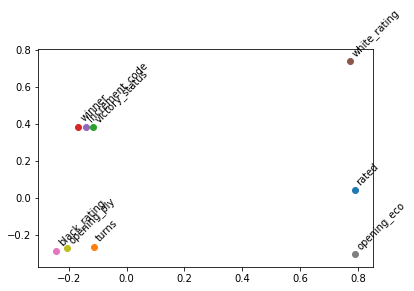

In [44]:
for k, (i,j) in enumerate(zip(X_scaled_r[:, 0], X_scaled_r[:, 1])):
    try:
        print(edf.columns[k], k, i, j)
        plt.scatter(i, j)
        plt.text(i, j+0.03, edf.columns[k], rotation=45)
    except IndexError:
        pass

plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_r, y, test_size=0.25, random_state=0)

In [46]:
logreg = LogisticRegression(solver="newton-cg", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[   0    0 2305]
 [   0  215    7]
 [   0    0 2488]]
0.5555826281209155


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
svc = svm.SVC(kernel='rbf', C=10, gamma='scale')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[   0    0 2305]
 [   0  215    7]
 [   0    0 2488]]
0.5555826281209155


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


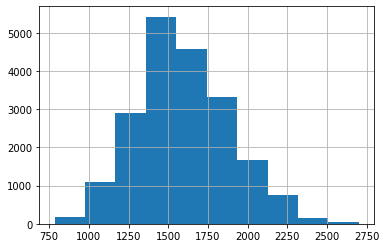

In [48]:
df.white_rating.hist()

In [49]:
edf['avg_rating'] = (edf.white_rating + edf.black_rating) / 2
edf_high = edf[edf.avg_rating > 1600]
edf_low = edf[edf.avg_rating <= 1600]

In [50]:
edf_high

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,avg_rating
7,0,9,3,0,114,1413,2108,71,5,1760.5
11,0,38,3,0,205,1381,1867,154,9,1624.0
12,0,60,3,0,310,1381,1936,152,3,1658.5
39,0,34,3,2,248,2449,978,20,3,1713.5
43,0,66,3,2,284,2443,978,133,17,1710.5
...,...,...,...,...,...,...,...,...,...,...
20026,1,80,3,0,19,1822,1872,117,4,1847.0
20027,1,47,1,2,19,1842,1885,91,5,1863.5
20028,1,115,1,2,19,1878,1720,10,2,1799.0
20029,1,37,3,0,108,1890,1866,11,2,1878.0


In [51]:
edf_low

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,avg_rating
0,0,13,2,2,110,1500,1191,248,5,1345.5
1,1,16,3,0,298,1322,1261,71,4,1291.5
2,1,61,1,2,298,1496,1500,171,3,1498.0
3,1,61,1,2,187,1439,1454,241,3,1446.5
4,1,95,1,2,247,1523,1469,192,5,1496.0
...,...,...,...,...,...,...,...,...,...,...
20053,1,24,3,2,21,1691,1220,61,2,1455.5
20054,1,82,1,0,19,1233,1196,37,2,1214.5
20055,1,35,1,2,19,1219,1286,239,3,1252.5
20056,1,109,3,2,19,1360,1227,78,4,1293.5


In [52]:
X_high = edf_high.drop(columns=['winner'])
y_high = edf_high['winner']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.25, random_state=0)

In [54]:
logreg = LogisticRegression(solver="newton-cg", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[637   0 444]
 [  5 118   2]
 [311   0 764]]
0.7554181343080059


/usr/local/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [55]:
svc = svm.SVC(kernel='rbf', C=10, gamma='scale')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[578   0 503]
 [ 51   0  74]
 [259   0 816]]
0.4161214107702342


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
X_low = edf_low.drop(columns=['winner'])
y_low = edf_low['winner']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.25, random_state=0)

In [58]:
logreg = LogisticRegression(solver="newton-cg", multi_class="multinomial")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[ 707    0  535]
 [   5  110    2]
 [ 354    0 1021]]
0.7593433736911873


/usr/local/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [59]:
svc = svm.SVC(kernel='rbf', C=10, gamma='scale')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[ 559    0  683]
 [  50    0   67]
 [ 266    0 1109]]
0.40464792722030046


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [61]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1531    0  774]
 [   3  216    3]
 [ 711    0 1777]]
0.7880491396978114


In [62]:
rforest = RandomForestClassifier(n_estimators=1000)
rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1522    0  783]
 [   4  216    2]
 [ 697    0 1791]]
0.7886362751753117


In [63]:
rforest = RandomForestClassifier(n_estimators=50)
rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1527    0  778]
 [   3  216    3]
 [ 729    0 1759]]
0.7850443401400232


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.25, random_state=0)

In [65]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[708   0 373]
 [  4 119   2]
 [345   0 730]]
0.7691452742658598


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.25, random_state=0)

In [67]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[771   0 471]
 [  6 110   1]
 [391   0 984]]
0.7680525803614696


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [69]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1522    0  783]
 [   4  216    2]
 [ 705    0 1783]]
0.7875592801723035


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y, test_size=0.25, random_state=0)

In [71]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1424   25  856]
 [ 107   14  101]
 [ 837   15 1636]]
0.4516251967208307


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_r, y, test_size=0.25, random_state=0)

In [73]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

y_pred = rforest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

[[1148    2 1155]
 [   4  216    2]
 [1047    0 1441]]
0.6860802782485192


# Conclusions:
* Chess is difficult to predict based on ratings and openings alone
* Logistic Regression worked relatively well
* SVM with data scaling also worked well
* Random Forest was about as good as Logistic Regression
* PCA was unhelpful for this dataset

# Future Steps
* Experiment with different C values for SVC
* Other models and methods (Solo Decision Tree, Gradient Boosting, etc.)
* Utilize the list of moves
    * Are there particular spaces that, when taken, can predict a win?
    * Can a model predict the next move of a game?